In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importamos los datos:
data = pd.read_excel ('./CSM_dataset.xlsx')
df = pd.DataFrame(data)

## Plots:

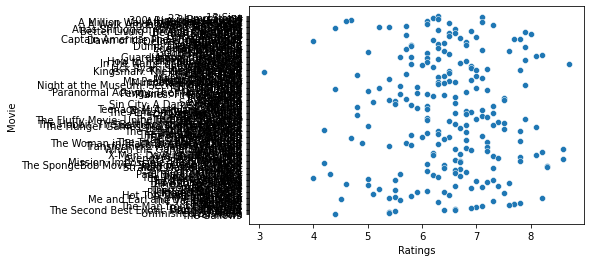

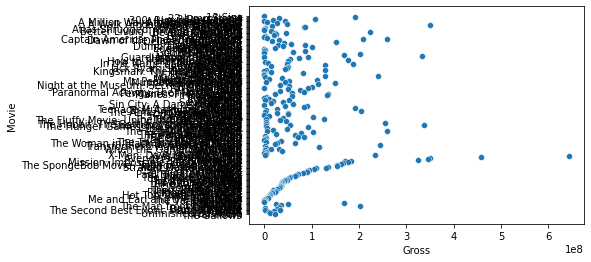

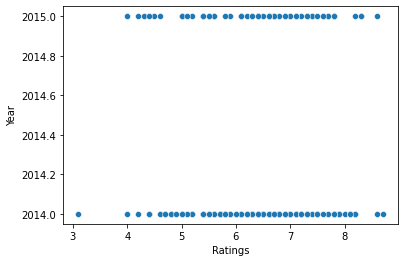

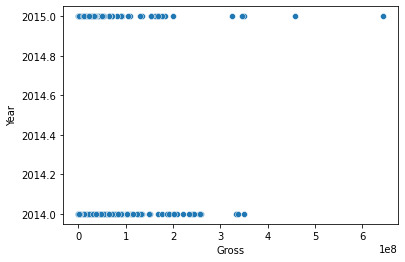

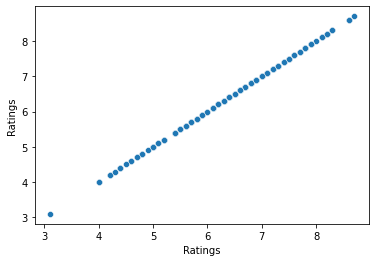

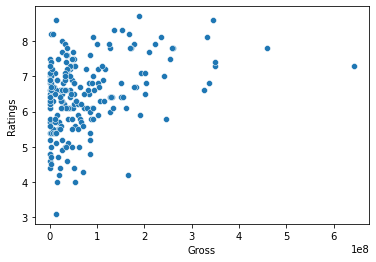

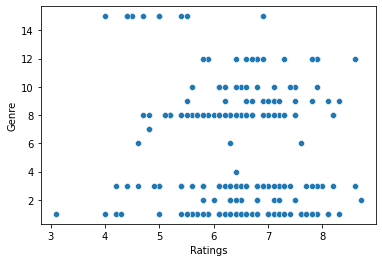

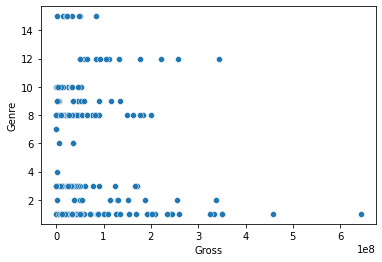

In [ ]:
# Hacemos plots de la relación entre cada variable y las variables que queremos predecir (Ratings o Gross):
for var in df:
  sns.scatterplot(x='Ratings', y = var, data=df)
  plt.show()
  sns.scatterplot(x='Gross', y = var, data=df)
  plt.show()

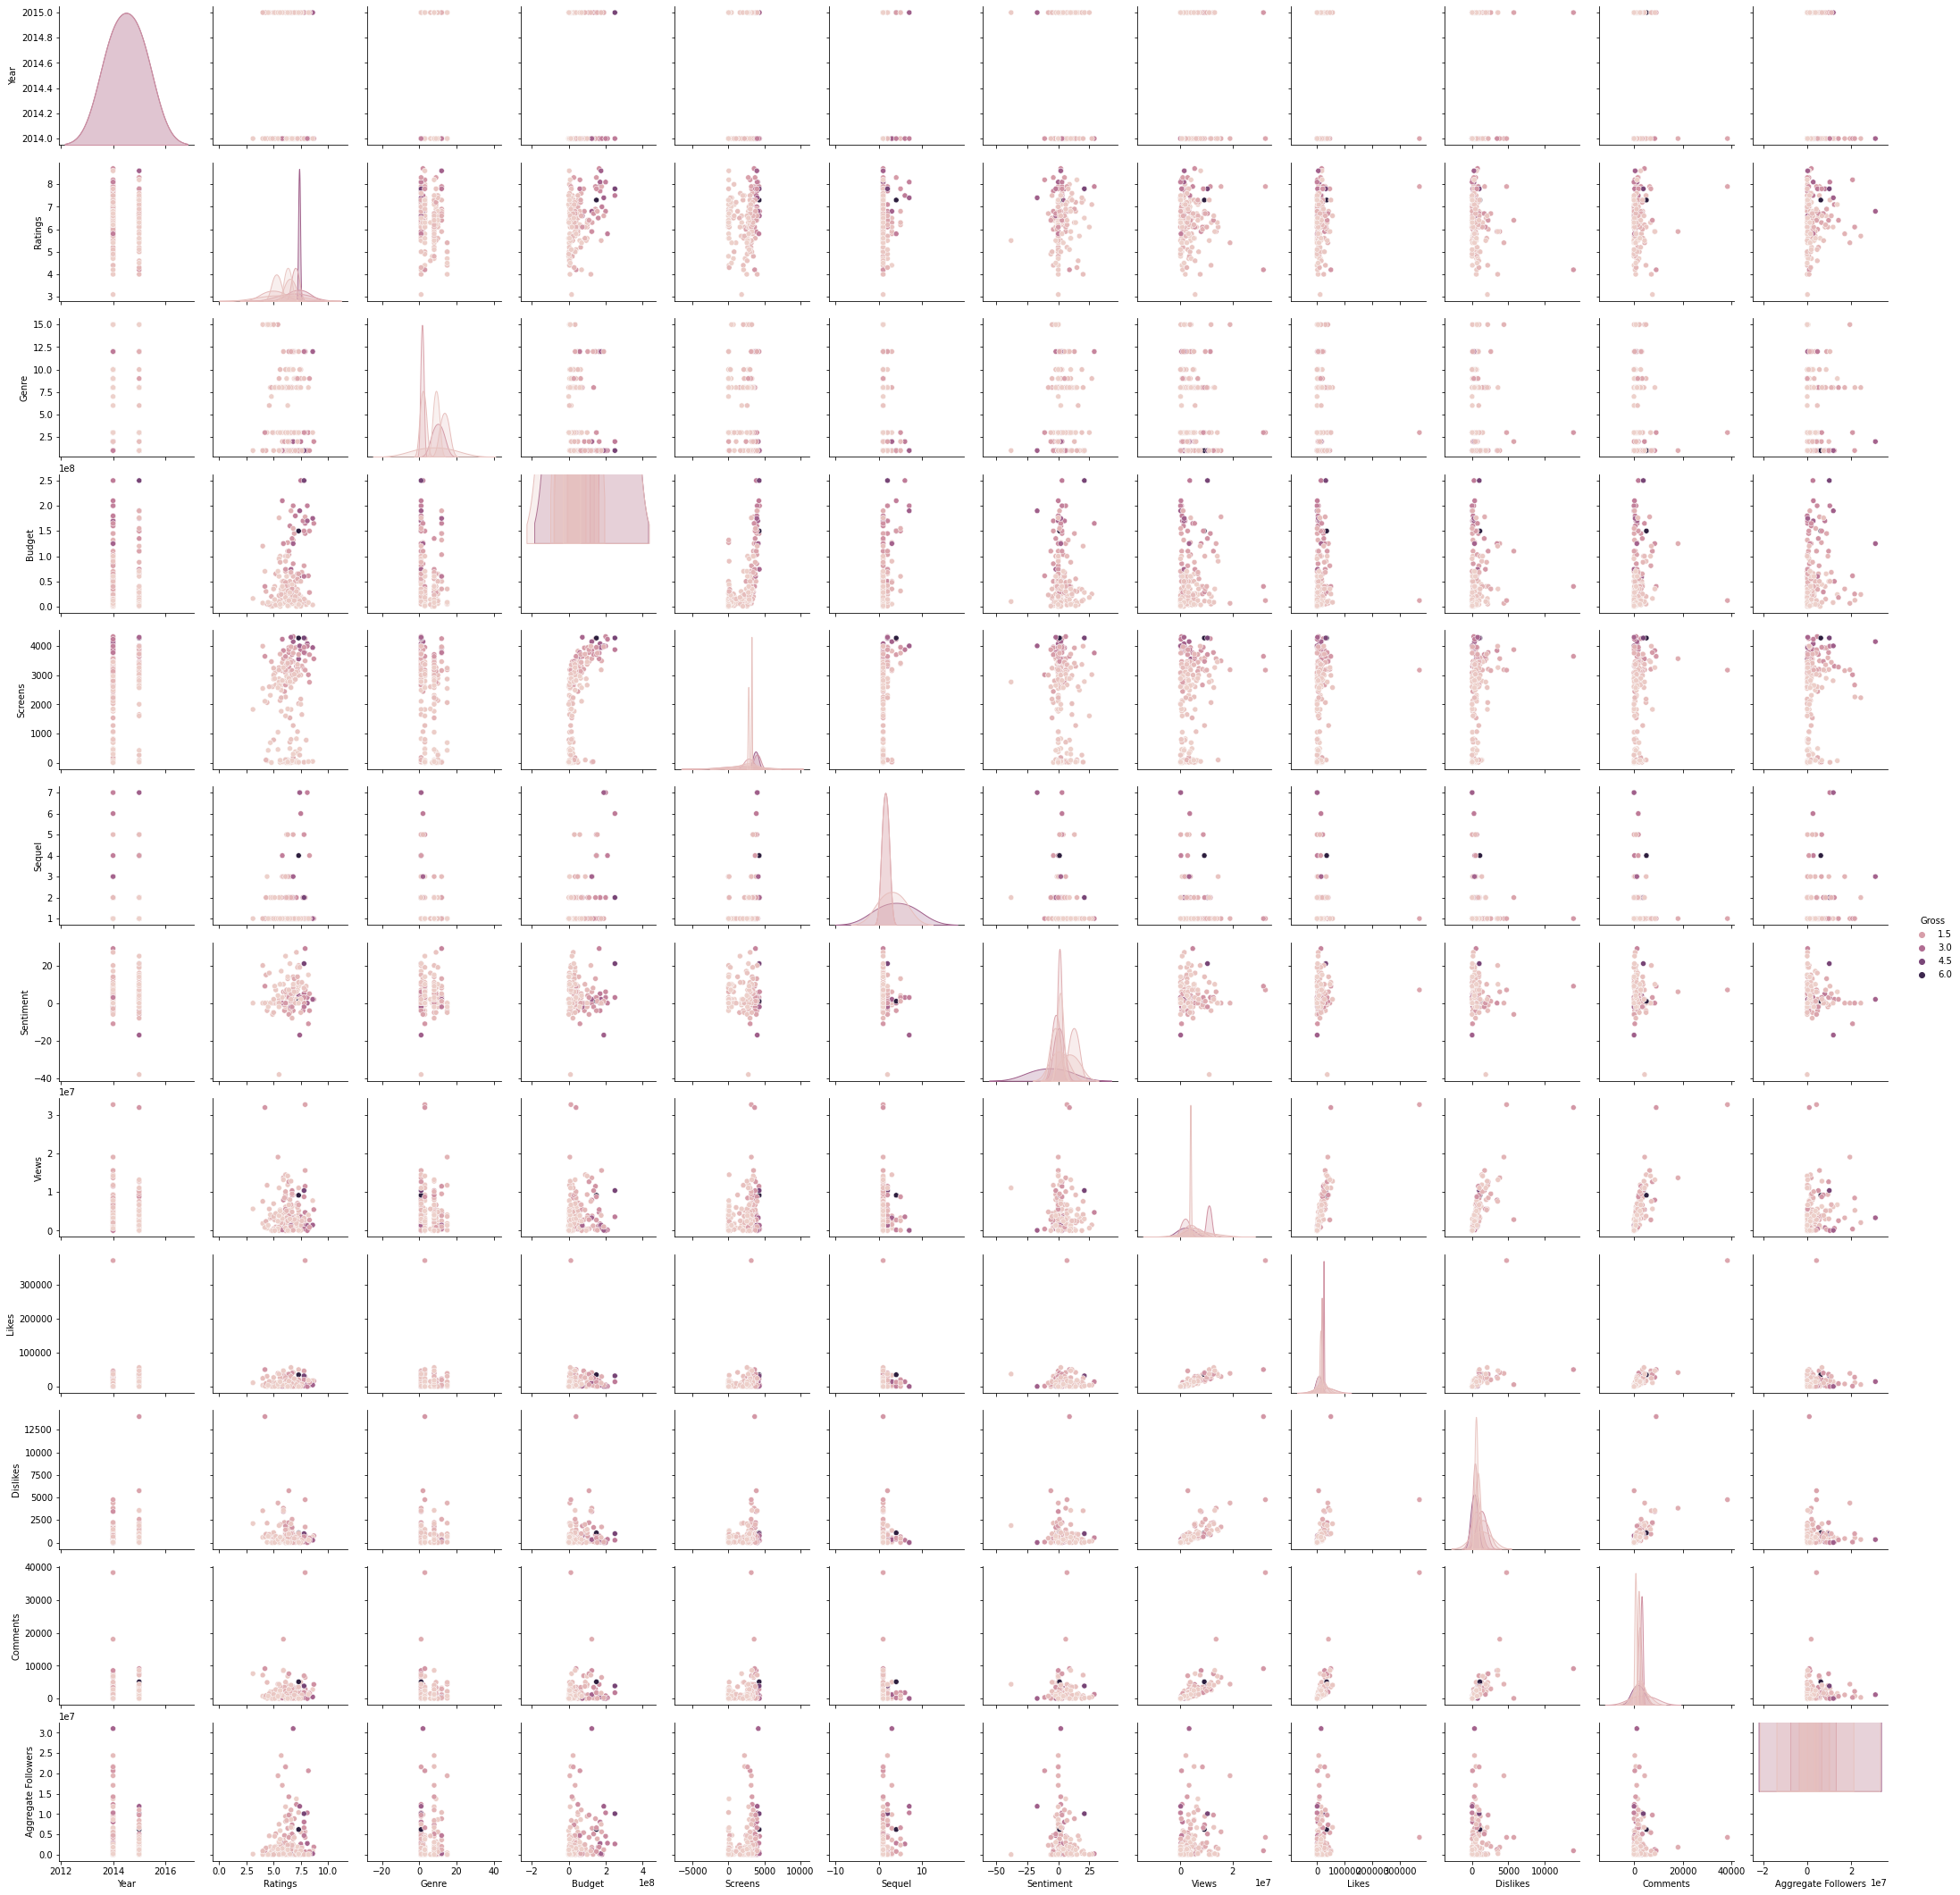

In [3]:
# Pair Plot de todas las variables utilizando Gross como hue:
sns.pairplot(df.dropna(axis = 'rows'), hue='Gross')

## Información de las variables:

In [4]:
df.head()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0


In [5]:
rows = len(df)
print("Rows: ", rows)
# Filas sin ningun NaN    
print("Shape of the datafile without NaNs: ", df.dropna(axis='rows').shape)

Rows:  231
Shape of the datafile without NaNs:  (187, 14)


In [6]:
# Características de cada columna:
nulls = df.isnull().sum().rename('Nulls')
nulls_percent = df.isnull().sum().apply(lambda col: round((col/rows)*100, 2)).rename('Nulls (%)')
types = df.dtypes.rename('Type')
values = df.apply(lambda col: len(col.unique())).rename("Unique Values")
pd.concat([types, nulls, nulls_percent, values], axis=1)

,Type,Nulls,Nulls (%),Unique Values
Movie,object,0,0.00,231
Year,int64,0,0.00,2
Ratings,float64,0,0.00,45
Genre,int64,0,0.00,11
Gross,int64,0,0.00,215
Budget,float64,1,0.43,105
Screens,float64,10,4.33,201
Sequel,int64,0,0.00,7
Sentiment,int64,0,0.00,36
Views,int64,0,0.00,231


In [7]:
# Correlación entre las variables no categoricas:
df_cont = df[['Ratings', 'Gross', 'Budget', 'Screens','Sequel', 'Views', 'Likes', 'Dislikes', 'Comments', 'Aggregate Followers']]
df_cont.corr()


,Ratings,Gross,Budget,Screens,Sequel,Views,Likes,Dislikes,Comments,Aggregate Followers
Ratings,1.000000,0.342204,0.288157,0.057625,0.105701,0.011710,0.073824,-0.187422,0.015679,0.078545
Gross,0.342204,1.000000,0.719839,0.586447,0.423711,0.176363,0.110432,0.161536,0.125960,0.301808
Budget,0.288157,0.719839,1.000000,0.595684,0.464733,0.114708,0.011701,0.096888,0.090559,0.168874
Screens,0.057625,0.586447,0.595684,1.000000,0.267456,0.256515,0.173473,0.268176,0.213039,0.210822
Sequel,0.105701,0.423711,0.464733,0.267456,1.000000,-0.042763,-0.036089,-0.059792,-0.069333,0.228649
Views,0.011710,0.176363,0.114708,0.256515,-0.042763,1.000000,0.677175,0.776105,0.710507,0.155044
Likes,0.073824,0.110432,0.011701,0.173473,-0.036089,0.677175,1.000000,0.470645,0.917492,0.078575
Dislikes,-0.187422,0.161536,0.096888,0.268176,-0.059792,0.776105,0.470645,1.000000,0.579966,0.052877
Comments,0.015679,0.125960,0.090559,0.213039,-0.069333,0.710507,0.917492,0.579966,1.000000,0.034332
Aggregate Followers,0.078545,0.301808,0.168874,0.210822,0.228649,0.155044,0.078575,0.052877,0.034332,1.000000


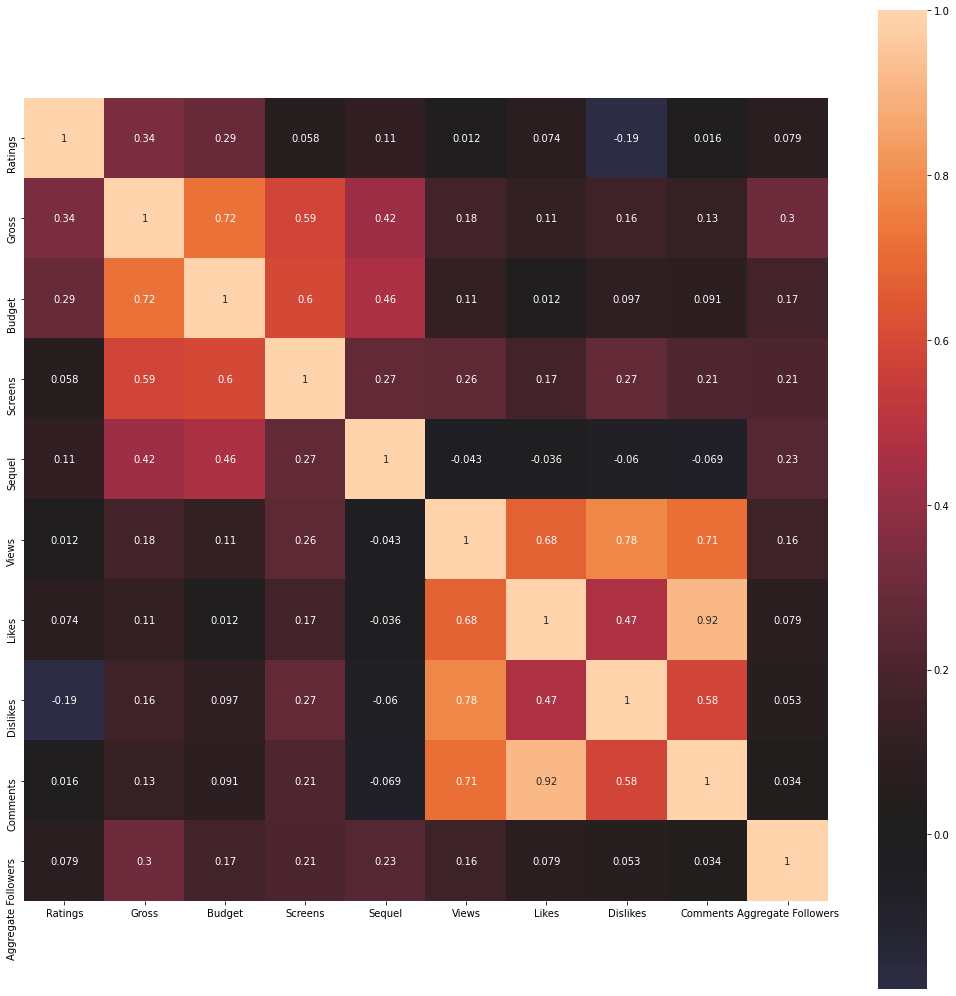

In [8]:
plt.figure(figsize=(18, 18))
df_cont = df[['Ratings', 'Gross', 'Budget', 'Screens','Sequel', 'Views', 'Likes', 'Dislikes', 'Comments', 'Aggregate Followers']]
sns.heatmap(df_cont.corr(),
            annot=True,
            center=0,
            square=True,
            cbar=True)

Vemos relación entre Budget y Gross y entre Screens y Gross.

Tambien es evidente la relación entre Likes, Dislikes y Comments

---

